In [14]:
#########################################################################################################################################
#Assignment 2: Linear Regression Model
#Completed by Paul Fernandez
#########################################################################################################################################
import pandas as pd
import numpy as np

df = pd.read_csv('/blue/zoo6927/share/Jupyter_Content/data/auto_mpg.csv')          #Pandas read csv file and input it into data frame "df" (very resourceful of them)
df

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [15]:
#########################################################################################################################################
df['weightperyear'] = (df.weight/df.year)                                          #Forms data column 'weight/year'
df['(weightperyear)^2'] = (df.weight/df.year)**2                                   

y = df.mpg                                                                         #We are observing miles per gallon, establishes mpg as column on y-axis
x = df[['weightperyear','(weightperyear)^2']]                                      #An array of the weight per year and it's squared value
x

,weightperyear,(weightperyear)^2
0,50.057143,2505.717551
1,52.757143,2783.316122
2,49.085714,2409.407347
3,49.042857,2405.201837
4,49.271429,2427.673673
...,...,...
387,34.024390,1157.659131
388,25.975610,674.732302
389,27.987805,783.317222
390,32.012195,1024.780637


In [16]:
#########################################################################################################################################
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y)                                               #Fits a linear model with the x and y columns using a library from sklearn
print(model.intercept_, model.coef_)                                               #Prints terms of the regression model


66.4236499031434 [-1.6185772  0.0122642]


In [17]:
model.score(x, y)                                                                  #Finds R^2 value of the model

0.7986070108094163

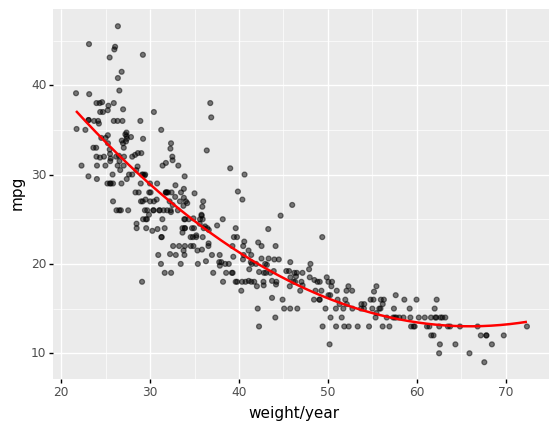

<ggplot: (2947036035847)>

In [18]:
#########################################################################################################################################
import plotnine as p9

xvalues = np.linspace(x.weightperyear.min(), x.weightperyear.max(), len(df.index)) #X value range is established using the entire index from this column
xtable = pd.DataFrame({                                                            
    'weightperyear': xvalues,                                                      #Inputs index created earlier into data frame and inputs under this column
    '(weightperyear)^2': xvalues**2                                                
})

y = model.predict(xtable)                                                          #Uses imported pandas to predict the y values from the data in the xtable variable (sounds illegal)

(p9.ggplot(data = df,                                                              
        mapping = p9.aes(x = 'weight/year', y = 'mpg'))                            #Chart created, X axis being formatted by weightperyear and y-axis being formatted by mpg
 + p9.geom_point(alpha = 0.5)                                                      #Puts points on graph with transparency
 + p9.geom_line(                                                                   
        mapping = p9.aes(x = xvalues, y = y), color = 'red', size = 1)             #Line is formed by earlier prediction and is colored red with an appropriate thickness
)